# **I. PERKENALAN**
    Nama    : Al Izhar Iqrami
    Batch   : 011 Data Science Hacktive8

# **II. IMPORT LIBRARY**

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# **III. DATA LOADING**

**Meload data dengan menggunakan library pandas**

In [3]:
data = pd.read_csv('ks-projects-201801.csv')
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# **IV. DATA CLEANING**

**Menyalin data asli dengan nama df**

In [4]:
df = data.copy()
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


**Melihat Ukuran Data**

In [5]:
df.shape

(378661, 15)

**Melihat Informasi Ringkas dari Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


**Mengubah tipe data pada kolom launched menjadi data time**

In [7]:
df['launched'] = pd.to_datetime(df['launched'])

**Mengecek Jumlah Missing Value Pada Data Frame**

In [8]:
for col in df:
  total_missing = df[col].isnull().sum()
  if total_missing > 0:
    print(col, ' : ', total_missing)

name  :  4
usd pledged  :  3797


Berdasarkan informasi yang diperoleh, terdapat missing value pada kolom name yang bertipe object dan kolom usd pledged yang bertipe float. Kolom yang bertipe object kami menghendling missing value dengan menghapus baris yang kosong, dan untuk kolom yang bertipe numerik/float kami menghendling missing value dengan nilai rata-rata

In [9]:
df['usd pledged'] = df['usd pledged'].fillna(df['usd pledged'].median())
row = df.dropna(inplace=True)

**Melalukan Pengecekan Missing Value**

In [10]:
cek = pd.DataFrame(df.isnull().sum(), columns=['Jumlah Missing Values'])
cek['% Missing Values'] = (cek/len(df)).round(2)*100
cek

,Jumlah Missing Values,% Missing Values
ID,0,0.0
name,0,0.0
category,0,0.0
main_category,0,0.0
currency,0,0.0
deadline,0,0.0
goal,0,0.0
launched,0,0.0
pledged,0,0.0
state,0,0.0


In [11]:
df.shape

(378657, 15)

# **V. EKSPLORASI DATA**

**Manipulasi kolom numerik kedalam data set baru dengan nama numeri_column**

In [12]:
numeric_column = df.select_dtypes(include=np.number)
numeric_column

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,1000.0,0.0,0,0.0,0.0,1533.95
1,1000003930,30000.0,2421.0,15,100.0,2421.0,30000.00
2,1000004038,45000.0,220.0,3,220.0,220.0,45000.00
3,1000007540,5000.0,1.0,1,1.0,1.0,5000.00
4,1000011046,19500.0,1283.0,14,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...
378656,999976400,50000.0,25.0,1,25.0,25.0,50000.00
378657,999977640,1500.0,155.0,5,155.0,155.0,1500.00
378658,999986353,15000.0,20.0,1,20.0,20.0,15000.00
378659,999987933,15000.0,200.0,6,200.0,200.0,15000.00


**Melihat Isi Kolom Category**

In [13]:
df['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

**Melihat jumlah variable yang sama pada kolom category**

In [14]:
df['category'].value_counts()

Product Design     22313
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [15]:
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


In [16]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [17]:
poetry_successful = df[(df['category']=='Poetry') & (df['state']=='successful')].sort_values(by='launched').reset_index(drop=True)
poetry_successful.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1867747509,100 Poems For 100 Days,Poetry,Publishing,USD,2010-01-21,3000.0,2009-11-16 20:05:02,3010.0,successful,29,US,3010.0,3010.0,3000.0
1,263468683,Poems + Prints: A Book Arts Project in the Wil...,Poetry,Publishing,USD,2010-04-01,1500.0,2010-02-25 05:39:21,2205.0,successful,68,US,2205.0,2205.0,1500.0
2,134715166,Let's make a SLAM poet~! Send K-Ruckus across ...,Poetry,Publishing,USD,2010-05-20,1200.0,2010-03-30 00:09:47,1205.0,successful,25,US,1205.0,1205.0,1200.0


In [18]:
narrative_film_successful = df[(df['category']=='Narrative Film') & (df['state']=='successful')].sort_values(by='launched').reset_index(drop=True)
narrative_film_successful.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1024509505,"Produce a ""Mean"" Feature Film",Narrative Film,Film & Video,USD,2009-07-25,6000.0,2009-07-15 21:14:49,9610.0,successful,10,US,9610.0,9610.0,6000.0
1,1731810209,I'M NOT ME - feature film,Narrative Film,Film & Video,USD,2009-12-11,6000.0,2009-09-13 17:42:46,7305.0,successful,55,US,7305.0,7305.0,6000.0
2,1268508807,Stadium Status,Narrative Film,Film & Video,USD,2009-11-07,3000.0,2009-10-07 21:28:25,3536.0,successful,51,US,3536.0,3536.0,3000.0


In [19]:
photography_successful = df[(df['category']=='Photography') & (df['state']=='successful')].sort_values(by='launched').reset_index(drop=True)
photography_successful.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,469734648,kicey to iceland,Photography,Photography,USD,2009-06-17,350.0,2009-04-29 06:43:44,1630.0,successful,31,US,1630.0,1630.0,350.0
1,1711918245,An Alternate Life - A Photo Project,Photography,Photography,USD,2009-08-02,500.0,2009-05-24 21:10:24,510.0,successful,10,US,510.0,510.0,500.0
2,1971808443,Wedding Chapel,Photography,Photography,USD,2009-07-02,3000.0,2009-06-03 18:13:52,3094.0,successful,52,US,3094.0,3094.0,3000.0


# **VI MEASURE OF CENTRAL TENDENCY**

**Mean**

In [20]:
print(f"Mean Dari Kolom Numerik\n {numeric_column.mean()}")

Mean Dari Kolom Numerik
 ID                  1.074732e+09
goal                4.908068e+04
pledged             9.683080e+03
backers             1.056185e+02
usd pledged         6.970198e+03
usd_pledged_real    9.059018e+03
usd_goal_real       4.545425e+04
dtype: float64


**Median**

In [21]:
print(f"Median Dari Kolom Numerik\n {numeric_column.median()}")

Median Dari Kolom Numerik
 ID                  1.075276e+09
goal                5.200000e+03
pledged             6.200000e+02
backers             1.200000e+01
usd pledged         3.947200e+02
usd_pledged_real    6.243800e+02
usd_goal_real       5.500000e+03
dtype: float64


**Modus**

In [39]:
print(f"Modus Dari Kolom Goal\n {numeric_column.goal.mode()}")

Modus Dari Kolom Goal
 0    5000.0
dtype: float64


# **VII. MEASURE OF VARIANCE**

**Range**

In [23]:
numcols = numeric_column
for c in numcols:
    print(f'{df[c].name} Range {str(df[c].max() - df[c].min())}')

ID Range 2147470250
goal Range 99999999.99
pledged Range 20338986.27
backers Range 219382
usd pledged Range 20338986.27
usd_pledged_real Range 20338986.27
usd_goal_real Range 166361390.70000002


**Variance**

In [24]:
print(f"Variance Dari Kolom Numerik\n{numeric_column.var()}")

Variance Dari Kolom Numerik
ID                  3.832690e+17
goal                1.400430e+12
pledged             9.146342e+09
backers             8.229933e+05
usd pledged         6.122700e+09
usd_pledged_real    8.276236e+09
usd_goal_real       1.329308e+12
dtype: float64


**Standard Deviation**

In [25]:
print(f"Standar Deviasi Dari Kolom Numerik\n{numeric_column.std()}")

Standar Deviasi Dari Kolom Numerik
ID                  6.190872e+08
goal                1.183397e+06
pledged             9.563651e+04
backers             9.071898e+02
usd pledged         7.824768e+04
usd_pledged_real    9.097382e+04
usd_goal_real       1.152956e+06
dtype: float64


# **VIII. HYPHOTESIS TESTING**

# ANOVA

**Kami tertarik ingin memerikasa apakah rata-rata categori Poetry, narrative film dan photography dengan state succesful pada kolom usd_goal_real berbeda secara signifikan?**

**Hypothesis:**
- **H0: μ_Poetry successfull = μ_Narrative Film successfull = μ_Photography successfull** 

- **H1: μ_Poetry successfull != μ_Narrative Film successfull != μ_Photography successfull**

*pada kasus ini kami menggunakan nilai Alpha = 0.05*

**Melakukan slicing terhadap categori poetry yang memiliki keterangan state successfull dan menghitung rata-ratanya**

In [26]:
poetry_successful1 = df[(df['category']=='Poetry') & (df['state']=='successful')].groupby('launched').sum()['usd_goal_real']
poetry_successful1.mean()

2417.5847843942506

**Melakukan slicing terhadap categori narrative film yang memiliki keterangan state successfull dan menghitung rata-ratanya**

In [27]:
narrative_film_successful1 = df[(df['category']=='Narrative Film') & (df['state']=='successful')].groupby('launched').sum()['usd_goal_real']
narrative_film_successful1.mean()

17593.962851465476

**Melakukan slicing terhadap categori photography yang memiliki keterangan state successfull dan menghitung rata-ratanya**

In [28]:
photography_successful1 = df[(df['category']=='Photography') & (df['state']=='successful')].groupby('launched').sum()['usd_goal_real']
photography_successful1.mean()

5700.548923240942

**Melakukan Uji Anova**

In [29]:
f_stat,p_value = stats.f_oneway(poetry_successful1, narrative_film_successful1, photography_successful1)
print('P-value:',p_value)

P-value: 1.9544174486138117e-13


Karena **P-value di bawah 0.05** maka kami **tolak H0** yaitu rata-rata categori Poetry, narrative film dan photography dengan state successfull pada kolom usd_goal_real berbeda secara signifikan

----

## T-test 2 sample and 2 tailed

**Melakukan gruping berdasarkan category dari column goal, usd_pledged_real dan usd_goal_real**

In [30]:
df.groupby('category')[['goal','usd_pledged_real','usd_goal_real']].mean()

,goal,usd_pledged_real,usd_goal_real
category,,,
3D Printing,47804.436310,66323.861611,46619.814466
Academic,57203.094978,2891.013886,54531.559913
Accessories,18969.507425,6526.295185,14683.712872
Action,336436.035135,3699.426324,317156.682865
Animals,11618.592157,2994.210078,10586.491412
...,...,...,...
Woodworking,12630.807198,1599.734387,11597.605176
Workshops,13358.262195,1663.994085,9755.995183
World Music,32345.877022,4199.595918,30895.982331


**Kami tertarik ingin melihat apakah rata-rata World Music sama dengan rata-rata Young Adult berdasarkan kolom usd_goal_real?. Adapun hypothesis testing yang kami gunakan ialah sebagai berikut**

**Hypothesis Testing**
- **H0 : μ_usd goal real World Music = μ_usd goal real Young**
- **H1 : μ_usd goal real World Music != μ_usd goal real Young**

**Melakukan slicing berdasarkan category World Musuc dan menghitung rata-ratanya**

In [31]:
World_Music2 = df[df['category']=='World Music']
World_Music2['usd_goal_real'].mean()

30895.982331113228

**Melakukan slicing berdasarkan category Young Adult dan menghitung rata-ratanya**

In [32]:
Young_Adult2 = df[df['category']=='Young Adult']
Young_Adult2['usd_goal_real'].mean()

39870.02220462851

In [33]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(Young_Adult2['usd_goal_real'], World_Music2['usd_goal_real'])

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.6861508477507574
t-statistics: 0.4041243737015745


c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-973826.1671507002


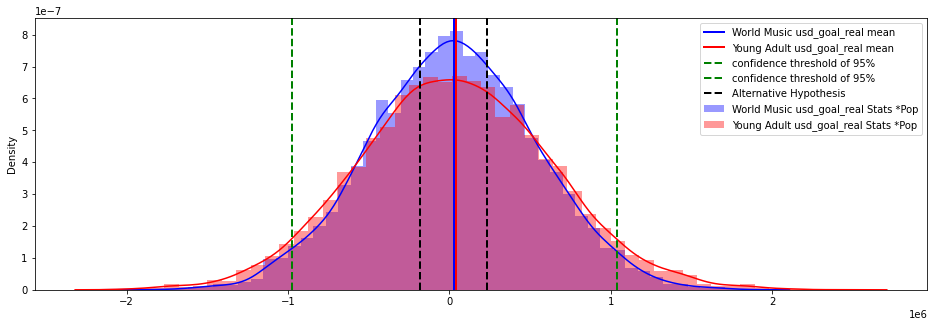

In [34]:
# simulation
World_Music2_pop = np.random.normal(World_Music2['usd_goal_real'].mean(),World_Music2['usd_goal_real'].std(),10000)
Young_Adult2_pop = np.random.normal(Young_Adult2['usd_goal_real'].mean(),Young_Adult2['usd_goal_real'].std(),10000)

# confidence interval based on gen 4
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, World_Music2['usd_goal_real'].mean(), World_Music2['usd_goal_real'].std())

plt.figure(figsize=(16,5))
sns.distplot(World_Music2_pop, label='World Music usd_goal_real Stats *Pop',color='blue')
sns.distplot(Young_Adult2_pop, label='Young Adult usd_goal_real Stats *Pop',color='red')

# mean
plt.axvline(World_Music2['usd_goal_real'].mean(), color='blue', linewidth=2, label='World Music usd_goal_real mean')
plt.axvline(Young_Adult2['usd_goal_real'].mean(), color='red',  linewidth=2, label='Young Adult usd_goal_real mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(World_Music2_pop.mean()+t_stat*World_Music2_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(World_Music2_pop.mean()-t_stat*World_Music2_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

Karena **P-value di atas 0.05** maka kami **terima H0** yaitu rata-rata usd goal real World dengan rata-rata usd goal real Young berdasarkan kolom usd_goal_real tidak berbeda secara signifikan

# **IX. KESIMPULAN**

**Measure Of Central Tendency :**

In [ ]:
'''
1) MEAN

ID                  1.074732e+09
goal                4.908068e+04
pledged             9.683080e+03
backers             1.056185e+02
usd pledged         6.970198e+03
usd_pledged_real    9.059018e+03
usd_goal_real       4.545425e+04

poetry_successful column usd_goal_real           2417.5847843942506
narrative_film_successful column usd_goal_real   17593.962851465476
photography_successful column usd_goal_real      5700.548923240942

World_Music column usd_goal_real     30895.982331113228
Young_Adult column usd_goal_real     39870.02220462851

2) MEDIAN

ID                  1.075276e+09
goal                5.200000e+03
pledged             6.200000e+02
backers             1.200000e+01
usd pledged         3.947200e+02
usd_pledged_real    6.243800e+02
usd_goal_real       5.500000e+03

3) MODUS

Modus Dari Kolom Goal   5000.0

'''

**Measure Of Variance**

In [ ]:
'''
1. Range

ID Range                2147470250
goal Range              99999999.99
pledged Range           20338986.27
backers Range           219382
usd pledged Range       20338986.27
usd_pledged_real Range  20338986.27
usd_goal_real Range     166361390.70000002

2. Variance Dari Kolom Numerik

ID                  3.832690e+17
goal                1.400430e+12
pledged             9.146342e+09
backers             8.229933e+05
usd pledged         6.122700e+09
usd_pledged_real    8.276236e+09
usd_goal_real       1.329308e+12

3. Standar Deviasi Dari Kolom Numerik

ID                  6.190872e+08
goal                1.183397e+06
pledged             9.563651e+04
backers             9.071898e+02
usd pledged         7.824768e+04
usd_pledged_real    9.097382e+04
usd_goal_real       1.152956e+06
'''

**Hypotesis Testing**

*Berdasarkan Uji Anova terkait categori Poetry, narrative film dan photography dengan state successfull pada kolom usd_goal_real kami peroleh P-value < Alpha sehingga dapat disimpulkan ketiga sampel tersebut berbeda secara signifikan*

*Berdasarkan Uji T-test 2 sample terkait category World Musuc dan Young Adult pada kolom usd_goal_real, kami peroleh nilai P-value > Alpha sehingga dapat disimpulkan kedua sampel tersebut tidak berbeda secara signifikan*